In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

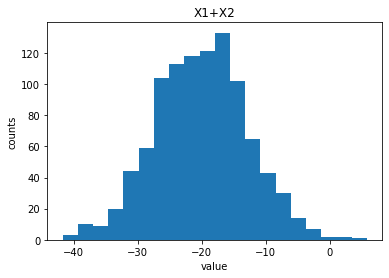

mean: -20.07582407824848
std: 7.187864813107468
Variance: 51.66540057150846


In [2]:
## PROBLEM 1
x1 = np.random.normal(-10, 5, 1000)
x2 = np.random.normal(-10, 5, 1000)
plt.hist(x1+x2, bins=20)
plt.title("X1+X2")
plt.xlabel("value")
plt.ylabel("counts")
plt.show()
print(f"mean: {(x1+x2).mean()}")
print(f"std: {(x1+x2).std()}")
print(f"Variance: {(x1+x2).std()**2}")

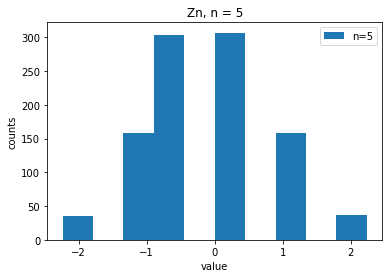

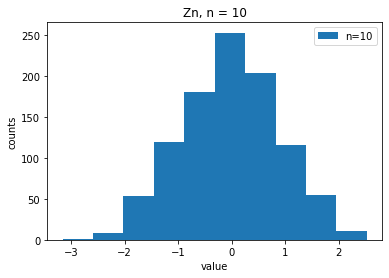

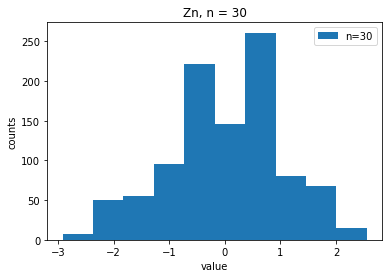

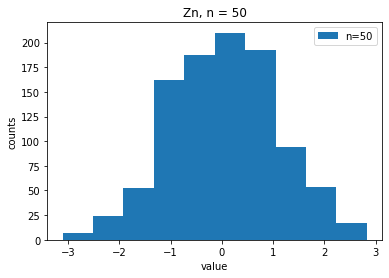

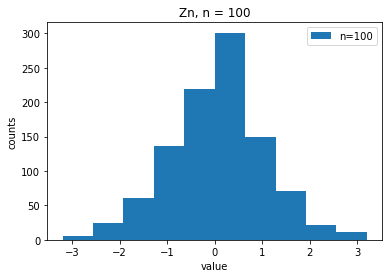

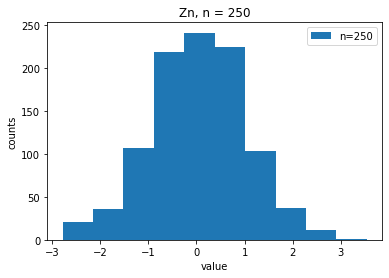

In [3]:
# PROBLEM2
bernoulli = lambda: 1 if np.random.random() >= 0.5 else -1
Zn = lambda n: sum([bernoulli() for _ in range(n)])/(n**(1/2))
def sampleZn(n, num=1000):
    return [Zn(n) for _ in range(num)]

ns = (5, 10, 30, 50, 100, 250)
for n in ns:
    plt.hist(sampleZn(n), label=f"n={n}")
    plt.title(f"Zn, n = {n}")
    plt.xlabel("value")
    plt.ylabel("counts")
    plt.legend()
    plt.show()




In [4]:
# PROBLEM 3
x = np.random.normal(0, 5, 25000)
# mean calculation
m = x.sum() / x.size
# variance calculation
sig_sq = ((x-m)**2).sum()/(x.size-1) 
print(f"mean estimate: {m}")
print(f"variance estimate: {sig_sq}")

mean estimate: -0.015675956103461074
variance estimate: 24.846715348507285


In [12]:
# PROBLEM 4
x, y = np.random.multivariate_normal((-5,5), ((20, .8),(.8, 30)), 10000).T
x_mean = x.sum() / 10000
y_mean = y.sum() / 10000
cov = (((x - x_mean) * ( y - y_mean)).sum())/(10000-1)
sigx = ((x - x_mean)**2).sum()/(9999)
sigy = ((y - y_mean)**2).sum()/(9999)

print(f"mean: {[x_mean, y_mean]}")
print(f"covariance matrix: {[[sigx, cov], [cov, sigy]]}")


mean: [-5.015670701145734, 5.043303337285589]
covariance matrix: [[20.016106429033922, 0.8624920219774562], [0.8624920219774562, 29.13493517598693]]
